Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimete

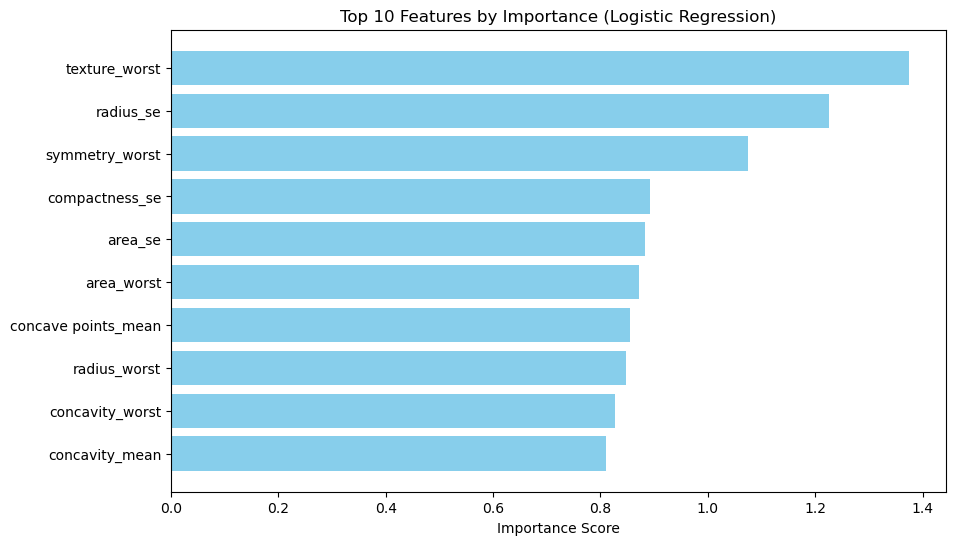

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Load Dataset
file_path = "data.csv"  # Update with your file path
data = pd.read_csv(file_path)

# 2. Exploratory Data Analysis
print("Dataset Overview:")
print(data.info())
print("\nDataset Statistics:")
print(data.describe())
print("\nClass Distribution:")
print(data['diagnosis'].value_counts())

# 3. Data Preprocessing
# Drop unnecessary columns
data = data.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Encode target variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Features and target split
X = data.drop(columns=["diagnosis"])
y = data['diagnosis']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Classification Model
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Feature Selection
# Feature importance using Logistic Regression coefficients
feature_importance = pd.DataFrame({
    "Feature": data.drop(columns=["diagnosis"]).columns,
    "Importance": np.abs(model.coef_[0])
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Features by Importance:\n", feature_importance.head(10))

# Plot feature importance
import matplotlib.pyplot as plt

top_features = feature_importance.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.title("Top 10 Features by Importance (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()
